**Business Problem**

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

**Dataset**

The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. The dataset has the following features:

Dataset link: Aerofit_treadmill.csv

Product Purchased:	KP281, KP481, or KP781
Age:	In years
Gender:	Male/Female
Education:	In years
MaritalStatus:	Single or partnered
Usage:	The average number of times the customer plans to use the treadmill each week.
Income:	Annual income (in $)
Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
Miles:	The average number of miles the customer expects to walk/run each week

**Product Portfolio:**

The KP281 is an entry-level treadmill that sells for USD 1,500.
The KP481 is for mid-level runners that sell for USD 1,750.
The KP781 treadmill is having advanced features that sell for USD2,500.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Leading question - Which type of customer is buying which product? - Product chosen vs Customer Profile
# Data seems to be pre-sale customer profiling capturing their demographics & expectations on usage, fitness level & miles they plan to run on the treadmill

df = pd.read_csv("/content/sample_data/aerofit_treadmill.csv")

# 1. Defining Problem Statement and Analysing basic metrics

Observations on shape of data, data types of all the attributes,
conversion of categorical attributes to 'category' (If required), statistical summary

In [ ]:
df.shape

(180, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
# Convert categorical columns to "category" datatype for Memory efficiency (uses lesser space & so leads to faster computations)
df['Gender'] = df['Gender'].astype('category')
df['MaritalStatus'] = df['MaritalStatus'].astype('category')
df['Product'] = df['Product'].astype('category')

# Fitness column is self-rating of customer about current fitness level - allowed values are 1 to 5 (1-Poor, 5 - Excellent)
# Convert Fitness column to "category" datatype with ordered=True to retain ordinal relationship
df['Fitness'] = pd.Categorical(df['Fitness'], ordered=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    category
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(4), int64(5)
memory usage: 8.4 KB


In [ ]:
df.describe()

,Age,Education,Usage,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,53719.577778,103.194444
std,6.943498,1.617055,1.084797,16506.684226,51.863605
min,18.000000,12.000000,2.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,104581.000000,360.000000


In [ ]:
# 2. Non-Graphical Analysis: Value counts and unique attributes
for col in df.columns:
  print(f"{col} - {df[col].unique()}")
  print(f"{col} - {df[col].value_counts()}")

Product - ['KP281', 'KP481', 'KP781']
Categories (3, object): ['KP281', 'KP481', 'KP781']
Product - Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64
Age - [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]
Age - Age
25    25
23    18
24    12
26    12
28     9
33     8
35     8
22     7
30     7
27     7
38     7
21     7
31     6
34     6
29     6
20     5
40     5
19     4
32     4
37     2
45     2
48     2
47     2
18     1
41     1
39     1
36     1
43     1
46     1
44     1
50     1
42     1
Name: count, dtype: int64
Gender - ['Male', 'Female']
Categories (2, object): ['Female', 'Male']
Gender - Gender
Male      104
Female     76
Name: count, dtype: int64
Education - [14 15 12 13 16 18 20 21]
Education - Education
16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: count, dtype: int64
MaritalStatus - ['Single', 'Partnered']
Categories (2, object): ['Partnered', 'Single']
MaritalStatus 

In [ ]:
# Usage - expected number of times customer want to use the treadmill in a week
# Range of values is only from 2 to 7 times a week, so converting to "category" datatype with ordered=True
df['Usage'] = pd.Categorical(df['Usage'], ordered=True)
df['Usage'].value_counts()

,count
Usage,
3,69
4,52
2,33
5,17
6,7
7,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    category
 6   Fitness        180 non-null    category
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(5), int64(4)
memory usage: 7.4 KB


<Figure size 800x800 with 0 Axes>

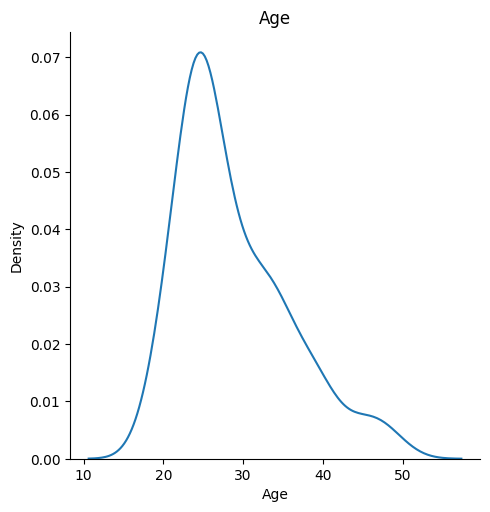

<Figure size 800x800 with 0 Axes>

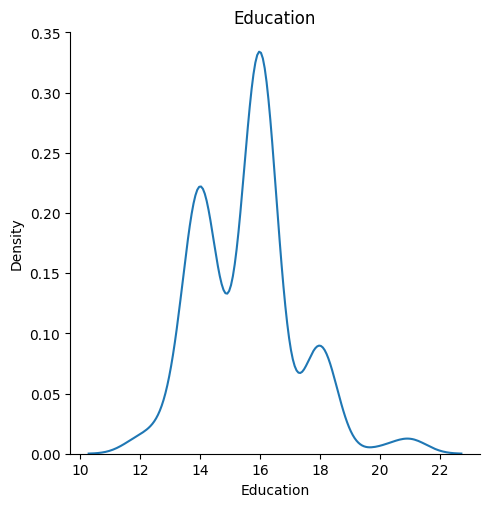

<Figure size 800x800 with 0 Axes>

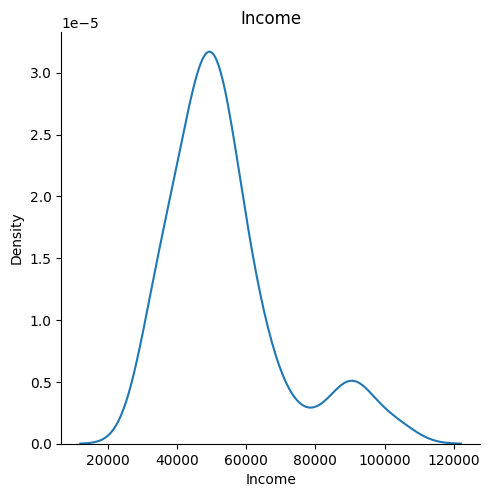

<Figure size 800x800 with 0 Axes>

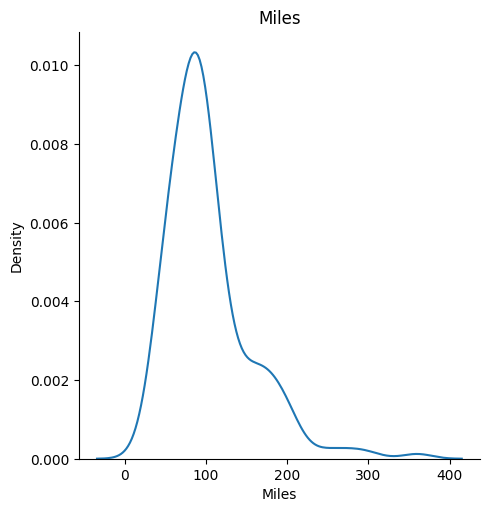

In [ ]:
# 3. Visual Analysis - Univariate & Bivariate
# For continuous variable(s): Distplot, countplot, histogram for univariate analysis
# For categorical variable(s): Boxplot
# For correlation: Heatmaps, Pairplots

import matplotlib.pyplot as plt
import seaborn as sns

num_cols =[]
cat_cols = []

for col in df.columns:
  if df[col].dtype == 'int64' or df[col].dtype == 'float64':
    num_cols.append(col)
  else:
    cat_cols.append(col)

# Univariate analysis - continuous variables - age, education, income, miles
for col in num_cols:
  plt.figure(figsize=(8,8))
  sns.displot(df[col], kind='kde')
  plt.title(col)
  plt.show()



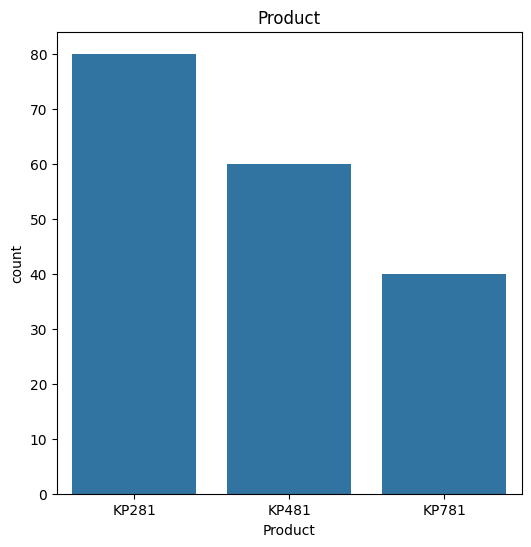

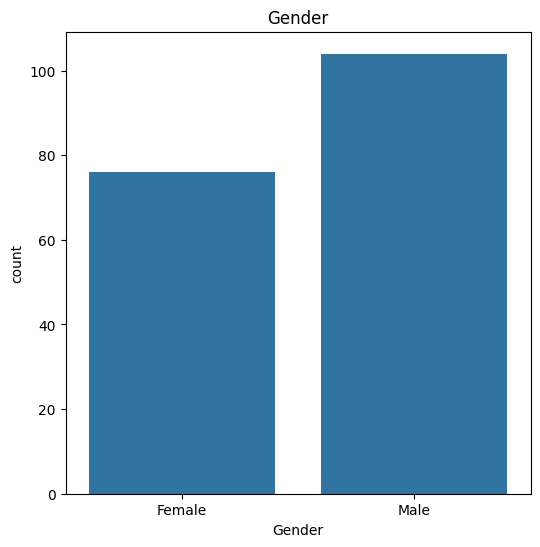

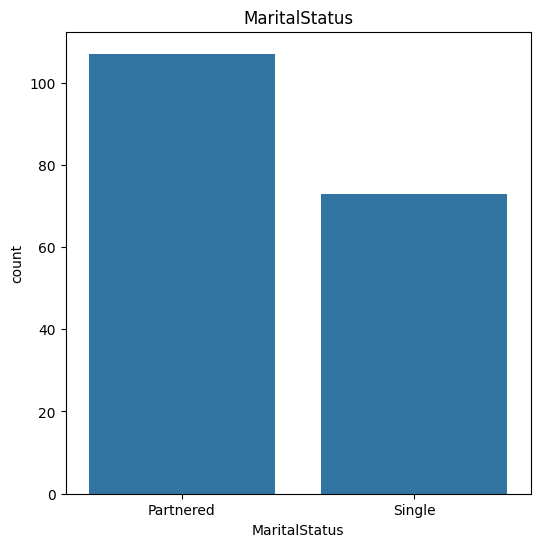

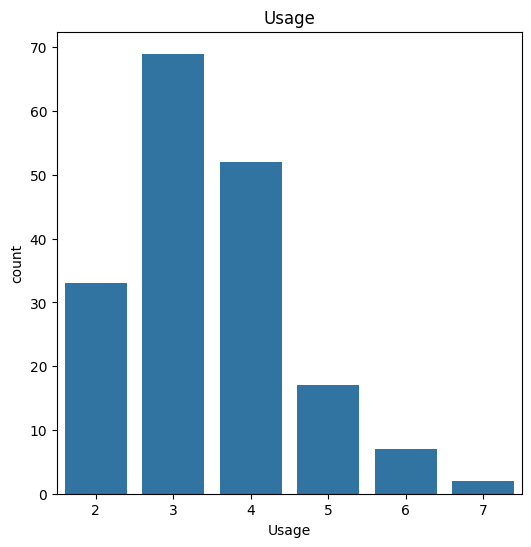

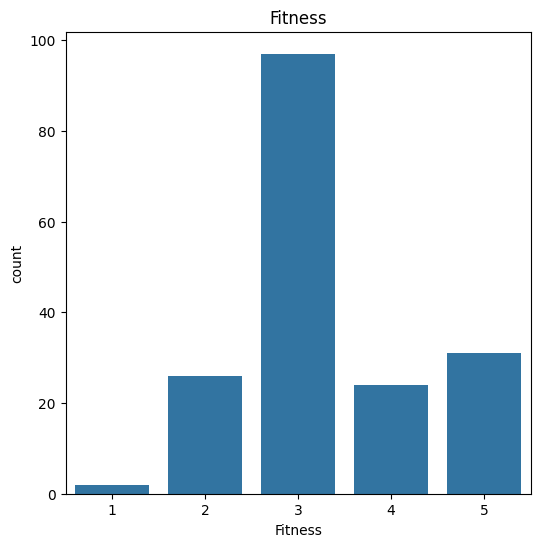

In [ ]:
# Univariate analysis - categorical variables - product, gender, marital status, usage, fitness
for col in cat_cols:
  plt.figure(figsize=(6,6))
  sns.countplot(x=col, data=df)
  plt.title(col)
  plt.show()



<Axes: >

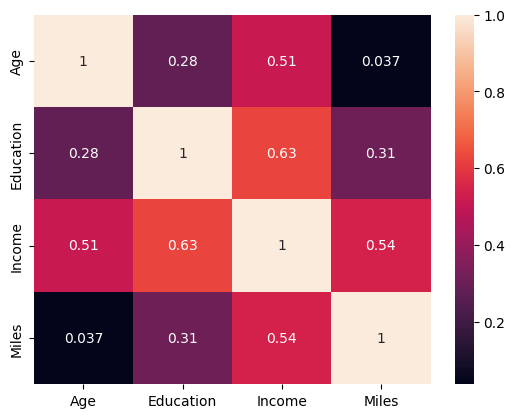

In [ ]:
# Correlation - heatmap
num_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(num_df.corr(), annot=True)

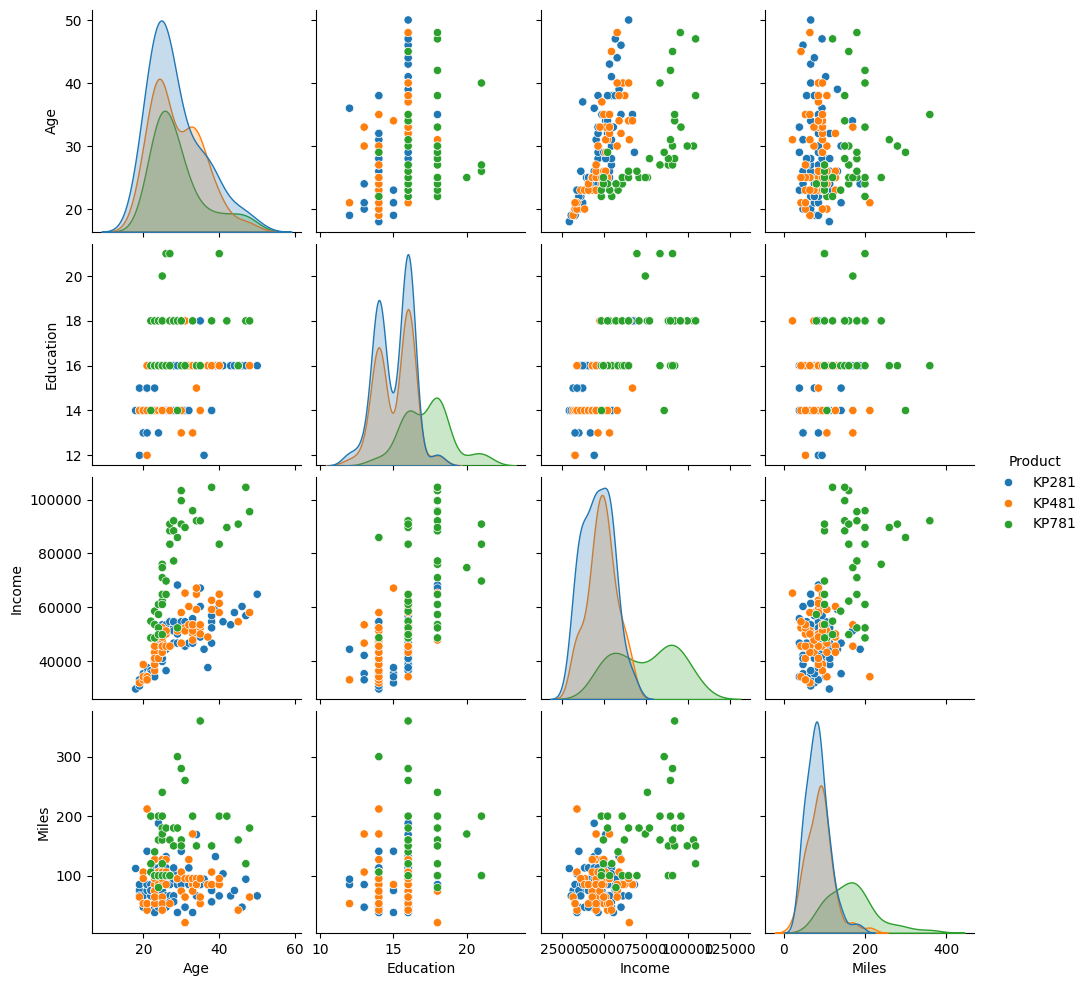

In [ ]:
# Correlation - pairplot
plt.show()
sns.pairplot(df, hue='Product')

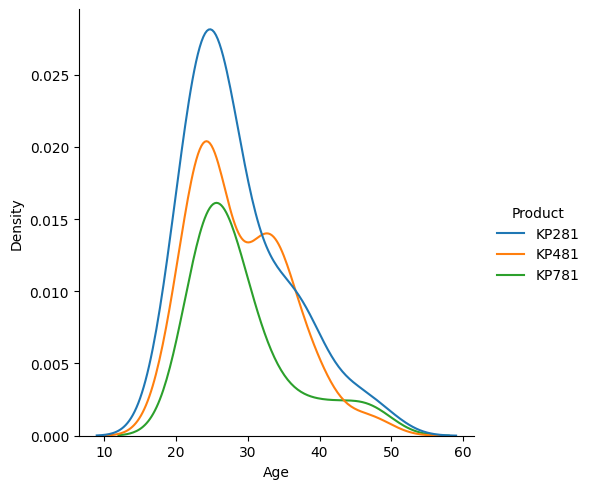

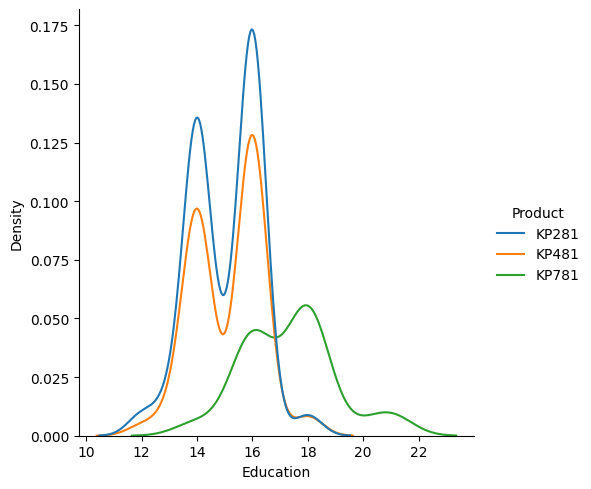

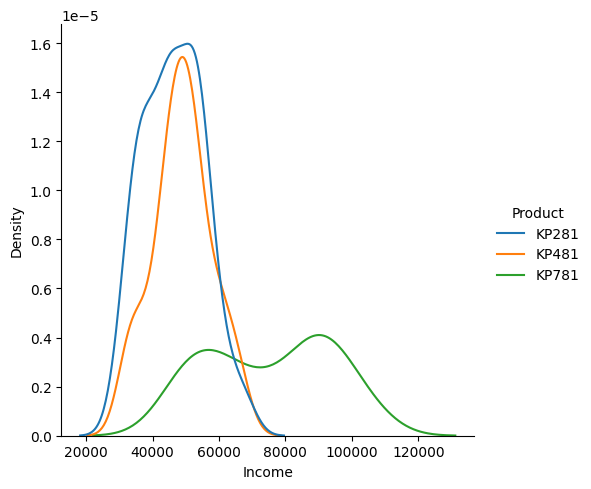

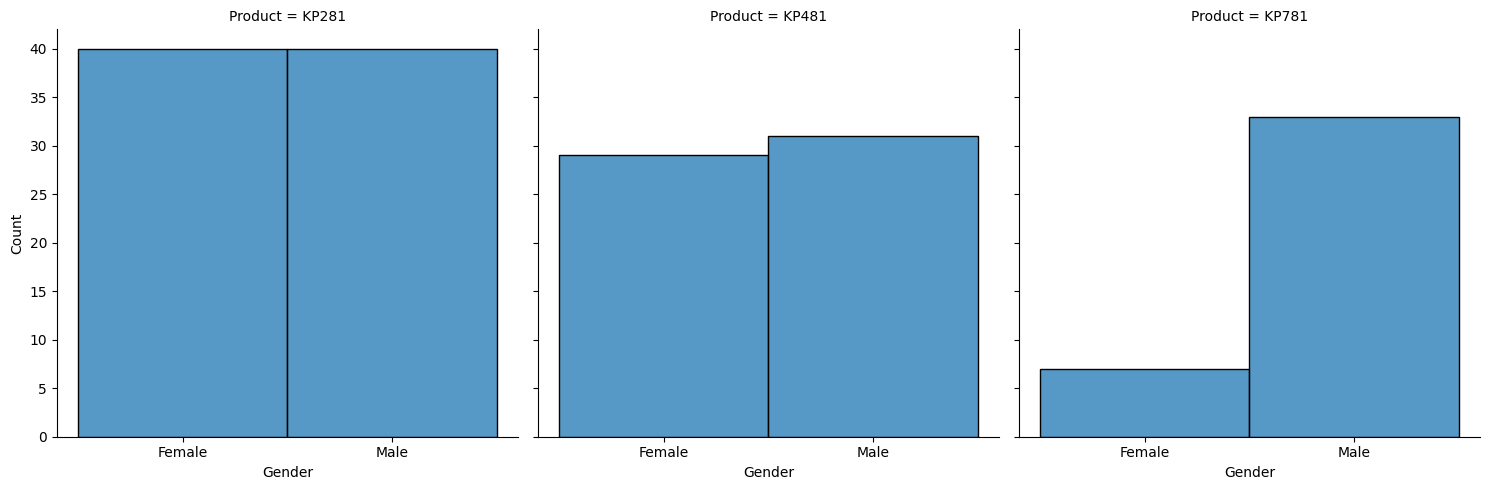

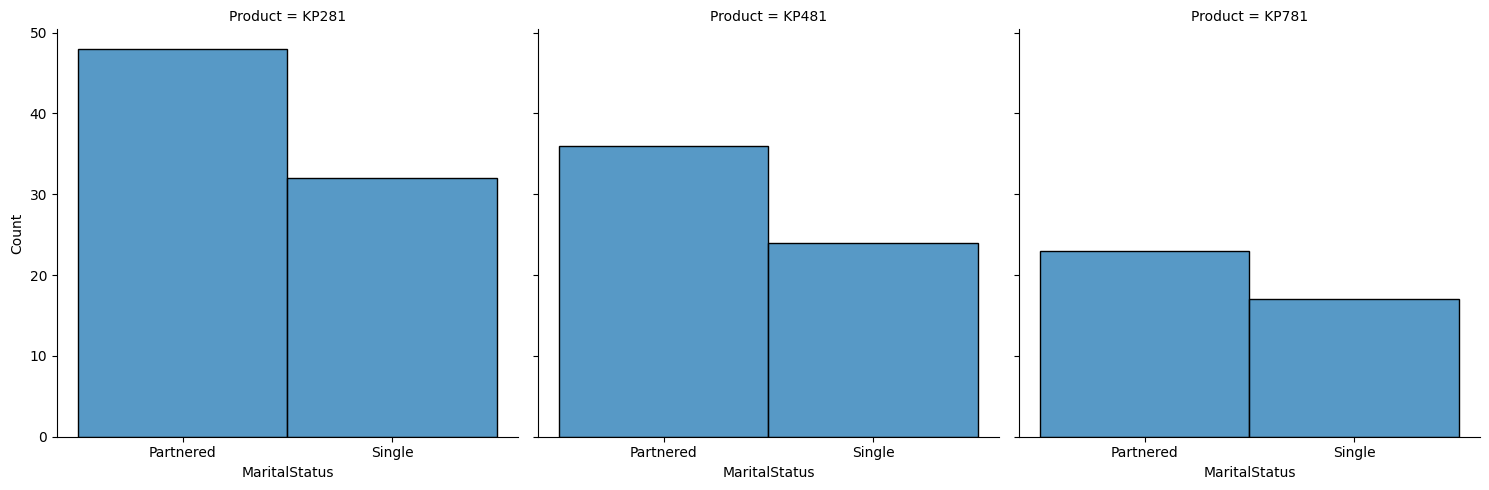

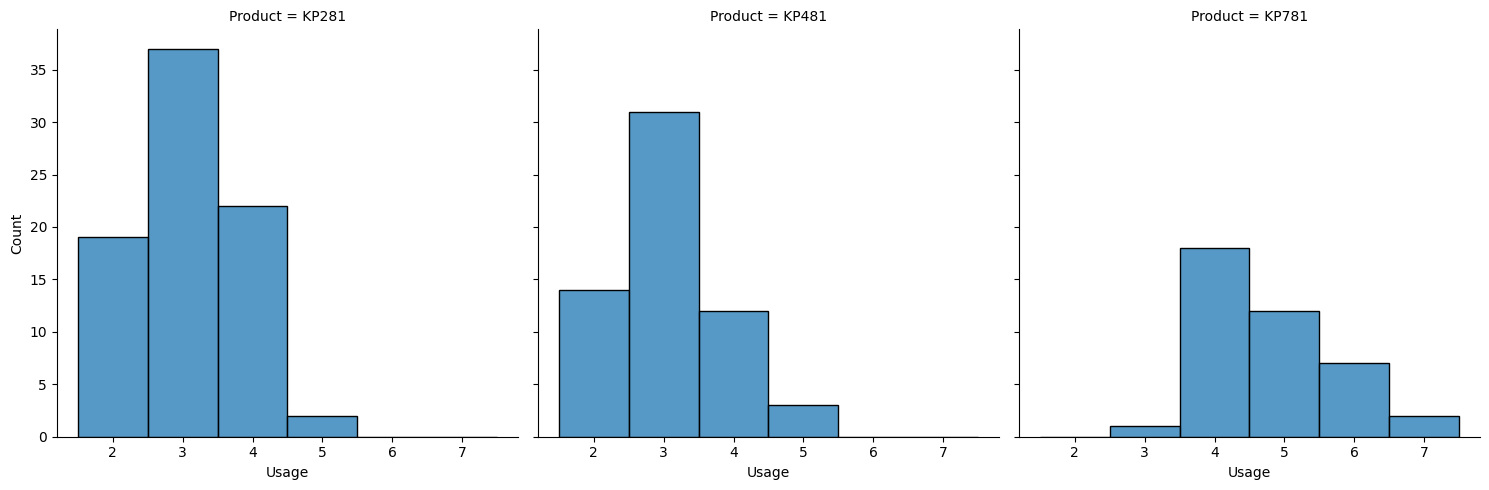

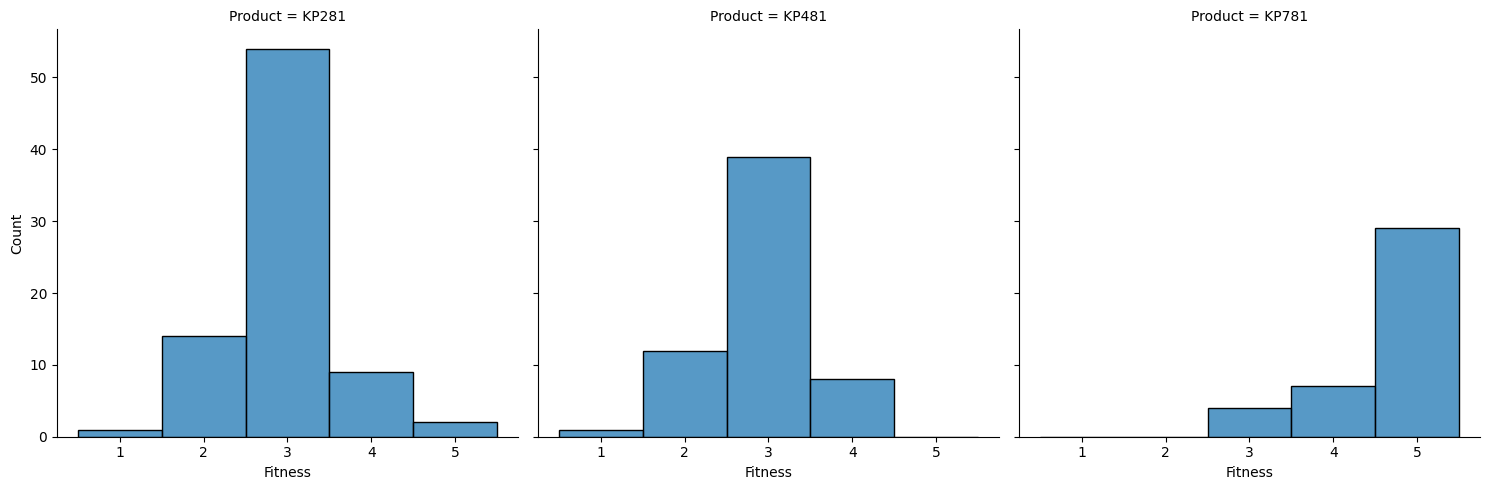

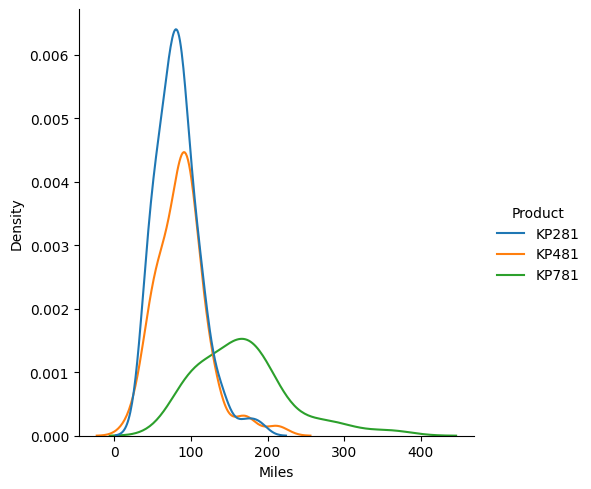

In [ ]:
# Bi-variate analysis - Product vs Demographics (Age / Gender / Education / Marital status / Income)
# Bi-variate analysis - Product vs Expectations (Usage per week / Current Fitness level / Miles they plan to run per week)

# Product vs Continuous variables
sns.displot(data=df, x="Age", hue="Product", kind="kde")
sns.displot(data=df, x="Education", hue="Product", kind="kde")
sns.displot(data=df, x="Income", hue="Product", kind="kde")

# Product vs Categorical variables
sns.displot(data=df, x="Gender", col="Product", kind="hist")
sns.displot(data=df, x="MaritalStatus", col="Product", kind="hist")

# Product vs Expectations - Usage, Fitness, Miles
sns.displot(data=df, x="Usage", col="Product", kind="hist")
sns.displot(data=df, x="Fitness", col="Product", kind="hist")
sns.displot(data=df, x="Miles", hue="Product", kind="kde")

In [ ]:
# 4. Missing Value & Outlier Detection

# Missing values
df.isna().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


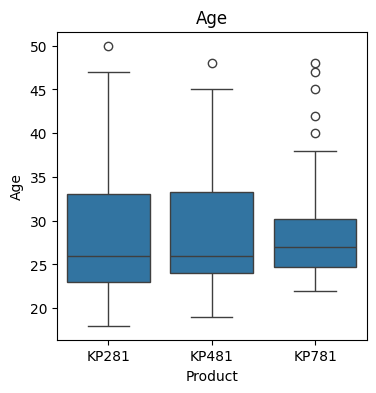

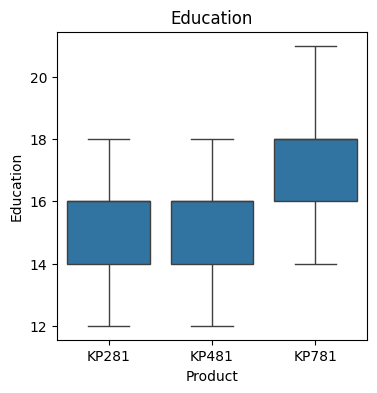

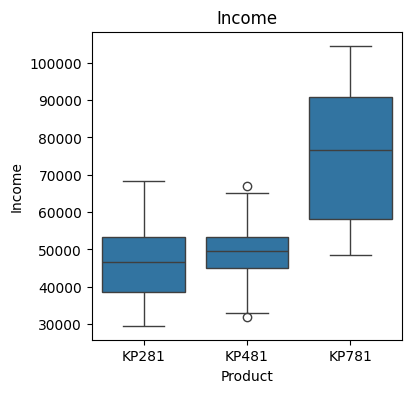

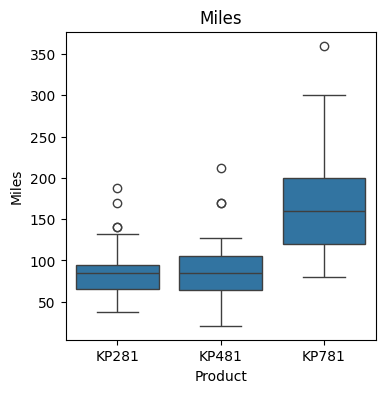

In [ ]:
# Outlier detection - numerical columns
for col in num_cols:
  plt.figure(figsize=(4,4))
  sns.boxplot(x='Product', y=col, data=df)
  plt.title(col)
  plt.show()


Crosstab: Product vs Product
Product  KP281  KP481  KP781
Product                     
KP281       80      0      0
KP481        0     60      0
KP781        0      0     40


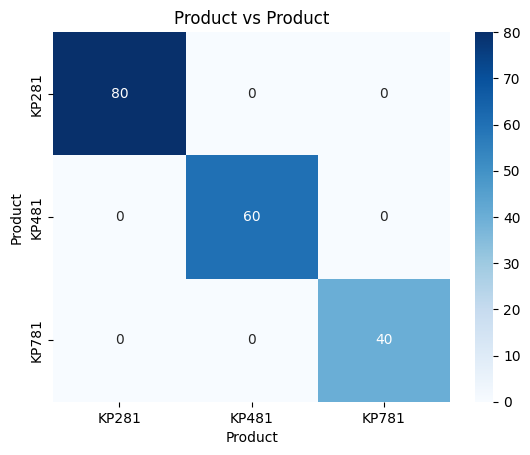


Crosstab: Product vs Gender
Gender   Female  Male
Product              
KP281        40    40
KP481        29    31
KP781         7    33


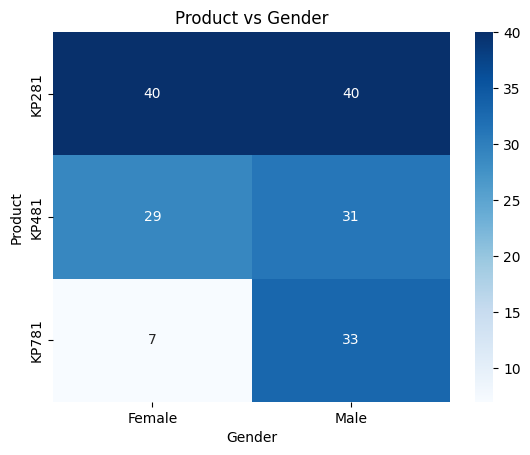


Crosstab: Product vs MaritalStatus
MaritalStatus  Partnered  Single
Product                         
KP281                 48      32
KP481                 36      24
KP781                 23      17


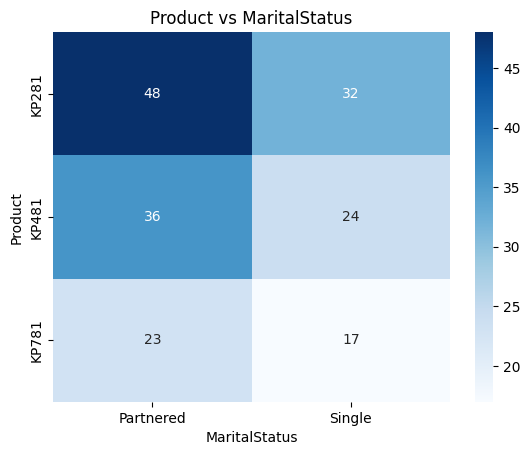


Crosstab: Product vs Usage
Usage     2   3   4   5  6  7
Product                      
KP281    19  37  22   2  0  0
KP481    14  31  12   3  0  0
KP781     0   1  18  12  7  2


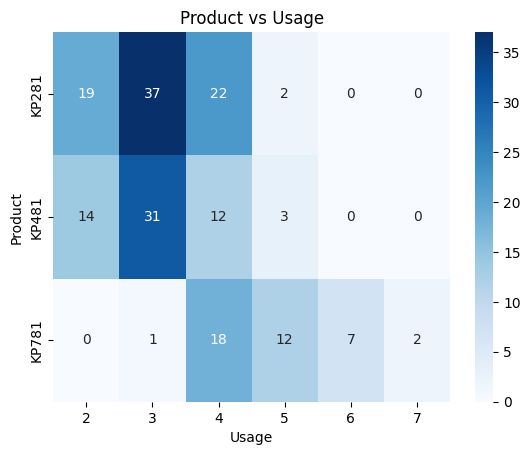


Crosstab: Product vs Fitness
Fitness  1   2   3  4   5
Product                  
KP281    1  14  54  9   2
KP481    1  12  39  8   0
KP781    0   0   4  7  29


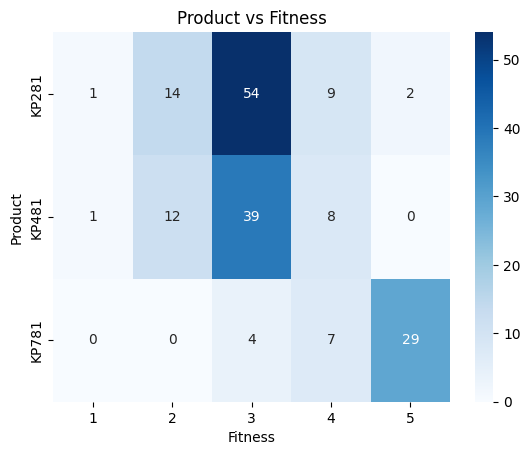

In [ ]:
# Outlier detection - categorical columns
for col in cat_cols:
  print(f"\nCrosstab: Product vs {col}")
  ct = pd.crosstab(df['Product'], df[col])
  print(ct)

  sns.heatmap(pd.crosstab(df['Product'], df[col]), annot=True, fmt='d', cmap='Blues')
  plt.title(f"Product vs {col}")
  plt.show()

In [ ]:
df.describe()

,Age,Education,Income,Miles
count,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,53719.577778,103.194444
std,6.943498,1.617055,16506.684226,51.863605
min,18.000000,12.000000,29562.000000,21.000000
25%,24.000000,14.000000,44058.750000,66.000000
50%,26.000000,16.000000,50596.500000,94.000000
75%,33.000000,16.000000,58668.000000,114.750000
max,50.000000,21.000000,104581.000000,360.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    category
 6   Fitness        180 non-null    category
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(5), int64(4)
memory usage: 7.4 KB


In [ ]:
# Marginal probabilities - categorical columns - prob of event X happening in the total events
for col in cat_cols:
  print(f"\nMarginal Probability: {col}")
  print(f"{df[col].value_counts(normalize=True)}")


Marginal Probability: Product
Product
KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: proportion, dtype: float64

Marginal Probability: Gender
Gender
Male      0.577778
Female    0.422222
Name: proportion, dtype: float64

Marginal Probability: MaritalStatus
MaritalStatus
Partnered    0.594444
Single       0.405556
Name: proportion, dtype: float64

Marginal Probability: Usage
Usage
3    0.383333
4    0.288889
2    0.183333
5    0.094444
6    0.038889
7    0.011111
Name: proportion, dtype: float64

Marginal Probability: Fitness
Fitness
3    0.538889
5    0.172222
2    0.144444
4    0.133333
1    0.011111
Name: proportion, dtype: float64


In [ ]:
# Marginal probabilities - numerical cols

# Bin Age into ranges
df['AgeGroup'] = pd.cut(df['Age'], bins=[20, 30, 40, float('inf')], labels=['20-30', '30-40', '40+'])
df['AgeGroup'].value_counts(normalize=True)



,proportion
AgeGroup,
20-30,0.647059
30-40,0.282353
40+,0.070588


In [ ]:
df['Education'].describe()

,Education
count,180.000000
mean,15.572222
std,1.617055
min,12.000000
25%,14.000000
50%,16.000000
75%,16.000000
max,21.000000


In [ ]:
# Bin Education into ranges
#df['EducationGroup'] = pd.cut(df['Education'], bins=[12, 14, 16, 18, 20, 22], labels=['12-14', '14-16', '16-18', '18-20', '20-22'])
df['EducationGroup'] = pd.cut(df['Education'], bins=[12, 16, 20, float('inf')], labels=['12-16', '16-20', '20+'])
df['EducationGroup'].value_counts(normalize=True)

,proportion
EducationGroup,
12-16,0.847458
16-20,0.135593
20+,0.016949


In [ ]:
df['Miles'].describe()

,Miles
count,180.000000
mean,103.194444
std,51.863605
min,21.000000
25%,66.000000
50%,94.000000
75%,114.750000
max,360.000000


In [ ]:
# Bin Miles into ranges
df['MilesGroup'] = pd.cut(df['Miles'], bins=[20, 70, 120, 170, float('inf')], labels=['20-70','70-120','120-170', '170+'])
df['MilesGroup'].value_counts(normalize=True)

,proportion
MilesGroup,
70-120,0.511111
20-70,0.255556
120-170,0.127778
170+,0.105556


In [ ]:
df['Income'].describe()

,Income
count,180.000000
mean,53719.577778
std,16506.684226
min,29562.000000
25%,44058.750000
50%,50596.500000
75%,58668.000000
max,104581.000000


In [ ]:
# Bin Income into bins
df['IncomeGroup'] = pd.cut(df['Income'], bins=[20000, 40000, 60000, 80000, float('inf')], labels=['20-40K','40-60K','60-80K','80K+'])
df['IncomeGroup'].value_counts(normalize=True)

,proportion
IncomeGroup,
40-60K,0.588889
20-40K,0.177778
60-80K,0.127778
80K+,0.105556


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Product         180 non-null    category
 1   Age             180 non-null    int64   
 2   Gender          180 non-null    category
 3   Education       180 non-null    int64   
 4   MaritalStatus   180 non-null    category
 5   Usage           180 non-null    category
 6   Fitness         180 non-null    category
 7   Income          180 non-null    int64   
 8   Miles           180 non-null    int64   
 9   AgeGroup        170 non-null    category
 10  EducationGroup  177 non-null    category
 11  MilesGroup      180 non-null    category
dtypes: category(8), int64(4)
memory usage: 8.4 KB


In [ ]:
# Conditional probabilities for - Product profiling, Targeting customers, Engagement by segment, Price sensitivity

# Add columns AgeGroup, EducationGroup & MilesGroup into cat_cols
cat_cols.append('AgeGroup')
cat_cols.append('EducationGroup')
cat_cols.append('MilesGroup')
cat_cols.append('IncomeGroup')

# Product profiling
for col in cat_cols:
  print(f"\nConditional Probability: Given Product X, what is prob of {col}")
  print(f"{pd.crosstab(df['Product'], df[col], normalize='index') * 100}")



Conditional Probability: Given Product X, what is prob of Product
Product  KP281  KP481  KP781
Product                     
KP281    100.0    0.0    0.0
KP481      0.0  100.0    0.0
KP781      0.0    0.0  100.0

Conditional Probability: Given Product X, what is prob of Gender
Gender      Female       Male
Product                      
KP281    50.000000  50.000000
KP481    48.333333  51.666667
KP781    17.500000  82.500000

Conditional Probability: Given Product X, what is prob of MaritalStatus
MaritalStatus  Partnered  Single
Product                         
KP281               60.0    40.0
KP481               60.0    40.0
KP781               57.5    42.5

Conditional Probability: Given Product X, what is prob of Usage
Usage            2          3     4     5     6    7
Product                                             
KP281    23.750000  46.250000  27.5   2.5   0.0  0.0
KP481    23.333333  51.666667  20.0   5.0   0.0  0.0
KP781     0.000000   2.500000  45.0  30.0  17.5  5.0

Con

In [ ]:

# Targeting customers
for col in cat_cols:
  print(f"\nConditional Probability: Give {col}, what is prob of Product X")
  print(f"{pd.crosstab(df[col], df['Product'], normalize='index') * 100}")


Conditional Probability: Give Product, what is prob of Product X
Product  KP281  KP481  KP781
Product                     
KP281    100.0    0.0    0.0
KP481      0.0  100.0    0.0
KP781      0.0    0.0  100.0

Conditional Probability: Give Gender, what is prob of Product X
Product      KP281      KP481      KP781
Gender                                  
Female   52.631579  38.157895   9.210526
Male     38.461538  29.807692  31.730769

Conditional Probability: Give MaritalStatus, what is prob of Product X
Product            KP281      KP481      KP781
MaritalStatus                                 
Partnered      44.859813  33.644860  21.495327
Single         43.835616  32.876712  23.287671

Conditional Probability: Give Usage, what is prob of Product X
Product      KP281      KP481       KP781
Usage                                    
2        57.575758  42.424242    0.000000
3        53.623188  44.927536    1.449275
4        42.307692  23.076923   34.615385
5        11.764706  17.647

In [ ]:
# Engagement by segment - P(Usage | Product) - How frequently are buyers using this product?
pd.crosstab(df['Product'], df['Usage'], normalize='index') * 100


Usage,2,3,4,5,6,7
Product,,,,,,
KP281,23.750000,46.250000,27.5,2.5,0.0,0.0
KP481,23.333333,51.666667,20.0,5.0,0.0,0.0
KP781,0.000000,2.500000,45.0,30.0,17.5,5.0


In [ ]:
# Engagement by segment - P(Product | Usage) - Given intended Usage, which product are they likely to buy?
pd.crosstab(df['Usage'], df['Product'], normalize='index') * 100

Product,KP281,KP481,KP781
Usage,,,
2,57.575758,42.424242,0.000000
3,53.623188,44.927536,1.449275
4,42.307692,23.076923,34.615385
5,11.764706,17.647059,70.588235
6,0.000000,0.000000,100.000000
7,0.000000,0.000000,100.000000


In [ ]:
# Price sensitivity - P(IncomeGroup | Product) - Which income groups are buying this product?
pd.crosstab(df['Product'], df['IncomeGroup'], normalize='index') * 100

IncomeGroup,20-40K,40-60K,60-80K,80K+
Product,,,,
KP281,28.75,63.750000,7.500000,0.0
KP481,15.00,73.333333,11.666667,0.0
KP781,0.00,27.500000,25.000000,47.5


In [ ]:
# Price sensitivity - P(Product | IncomeGroup) - Given income group, which product are they likely to buy?
pd.crosstab(df['IncomeGroup'], df['Product'], normalize='index') * 100

Product,KP281,KP481,KP781
IncomeGroup,,,
20-40K,71.875000,28.125000,0.000000
40-60K,48.113208,41.509434,10.377358
60-80K,26.086957,30.434783,43.478261
80K+,0.000000,0.000000,100.000000


**5. Business Insights & Recommendation based on Non-Graphical and Visual Analysis**

5.1 Comments on the range of attributes:

*   **Dataset:** Small dataset with 180 rows & 9 cols with info about customers buying 3 different models of treadmills
*   **Data ranges:** Age (18-50 years), Education years (12-21), Annual Income in USD (30K to 100K), Miles they want to run per week (20-360), Usage per week (2-7 times)

5.2 Comments on the distribution of the variables and relationship between them

**Customer Profiling - Significant observations**:
*   Gender - Female (90% - buy KP281 or KP481, 10% - buy KP781), Male (equal prob)
*   MaritalStatus - Parterned (78% - buy KP281 or KP481, 22% - buy KP781), Single (75% - buy KP281 or KP481, 25% - buy KP781)
*   Usage - 2 to 3 times per week (98% - buy KP281 or KP481, 2% - buy KP781), 6 to 7 times per week (100% - buy KP781)
*   Fitness rating - 5 rating on 5 (94% - buy KP781, 6% - buy KP281), 1/2/3 rating on 5 - (95%+ buy KP281 or KP481)
*   Age - 40+ years (33% buy KP781)
*   Education - 16+ years (80%+ buy KP781)
*   Miles - 170+ miles run per week (90% buy KP781)
*   Annual Income - 80K+ USD (100% buy KP781), 60-80K (44% buy KP781)

**Recommendations:**
*   1. Position KP781 as the Premium Model for Serious Users. Over 70% of KP781 buyers are in the highest fitness level. They also have the highest average miles run.
*   2. Promote KP281 to Young, Budget-Conscious Beginners. KP281 is popular for low-income groups. Most users have low fitness levels and light usage.
*   3. Promote KP481 to Middle-Aged Fitness-Conscious Users. KP481 attracts users aged 30–40, with medium fitness and usage. Income levels are moderate, and usage is more regular than KP281.